## Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the data
import os
os.chdir("C:\\Users\\Gourab\\Desktop\\R")

fram = pd.read_csv("framingham.csv")

In [ ]:
fram.shape

In [ ]:
fram.head(16)

In [ ]:
#description of the data
fram.describe()

#### 1. The isnul() method

In [ ]:
fram.isnull()

In [ ]:
type(fram.isnull())

In [ ]:
fram.sum()

In [ ]:
#Getting the number of missing values
fram.isnull().sum()

In [ ]:
type(fram.isnull().sum())

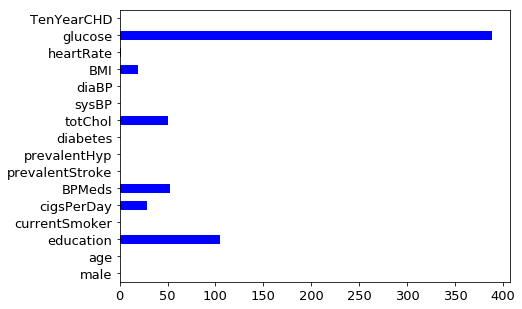

In [6]:
#Plotting the missing value information
miss = fram.isnull().sum()
miss.plot(kind='barh', figsize=(7,5), color="blue", fontsize=13)
plt.show()

In [3]:
miss = fram.isnull().sum()

In [5]:
type(miss)

pandas.core.series.Series

In [ ]:
#Getting the percentage of missing values
round(fram.isnull().sum()/len(fram.index)*100,3)

In [ ]:
#Only the variables that contains the missing values
x = round((fram.isnull()).sum()/len(fram.index)*100,3)
x[x>0]

#### 2. Complete Case Analysis

In [7]:
#Complete case considering all the variables
fram2 = fram.dropna()

In [8]:
fram2.shape

(3658, 16)

In [ ]:
fram.shape

In [ ]:
4240 - 3658

In [ ]:
sum(fram.isnull().sum())

In [ ]:
582*16-sum(fram.isnull().sum())

In [ ]:
#fram2.isnull().sum()

In [ ]:
#Complete case considering a subset of variables
fram2 = fram.dropna(subset = ["totChol","BMI","glucose"])

In [ ]:
fram2.shape

In [ ]:
4240-3828

In [ ]:
(fram2.isnull()).sum()

#### 3. Mean or Median Imputation

In [9]:
#Making a copy of the data
fram3 = fram.copy()

In [ ]:
#Mean of all the variables
fram3.mean()

In [10]:
#Imputing the missing values in the variable totChol using the mean
#Mean of age
fram3.totChol.mean()

236.69952267303103

In [13]:
#Spotting the missing values in the variable age
fram3.totChol[fram3.totChol.isnull()] = fram3.totChol.mean()

C:\Users\Gourab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
fram3.totChol.isnull().sum()

0

In [ ]:
#Checking if the missing values got imputed
fram3.totChol.isnull().sum()

In [ ]:
(fram3.isnull()).sum()

In [ ]:
#Re-checking the mean of the variable
fram3.age.mean()

In [ ]:
#Impute the missing values of the variable BMI with median (Do Yourself)




#### 4. Choosing Mean Imputation Vs Median Imputation

In [ ]:
#Check the distribution of the variable - If highly skewed go for median
import matplotlib.pyplot as plt

fram.hist("BMI", grid=False, edgecolor="black")
plt.show()

In [ ]:
print(fram.BMI.mean())
print(fram.BMI.median())

In [ ]:
#Taking the log transformation of the variable
import numpy as np

fram["logBMI"] = np.log(fram.BMI)
fram.head()

In [ ]:
#Histogram of the log transformed variable
fram.hist("logBMI", grid=False, edgecolor="black")
plt.show()

In [ ]:
print(np.log(fram.BMI.mean()))
print(np.log(fram.BMI.median()))

In [ ]:
#Dropping logBMI
fram = fram.drop("logBMI", axis=1)
fram.head()

#### 5. Imputation for Categorical Variable

In [ ]:
#Mode imputation
pd.crosstab(fram3.education,columns="counts")/4240*100

In [ ]:
#Impute the missing values by the most frequent value
fram3["education"][fram3["education"].isnull()] = 1

In [ ]:
fram3.education[fram3.education.isnull()] = 1

In [ ]:
pd.crosstab(fram3.education,columns="counts")

### Part B - Outlier Analysis

In [ ]:
fram.boxplot(figsize=(18,12),rot=90,grid=False)
plt.show()

In [ ]:
fram.boxplot(column='diaBP', grid=False, vert=False)

plt.xlabel('Diastolic Blood Pressure', fontsize=12)
plt.show()

In [ ]:
#Upper and Lower benchmarks for outliers

iqr = fram.diaBP.quantile(0.75) - fram.diaBP.quantile(0.25)
ub = fram.diaBP.quantile(0.75) + 1.5*iqr      # Q1 - 1.5*IQR
lb = fram.diaBP.quantile(0.25) - 1.5*iqr      # Q3 + 1.5*IQR

(lb, ub)

In [ ]:
sum(fram.diaBP > ub)

In [ ]:
sum(fram.diaBP < lb)

In [ ]:
#WINSORIZATION
fram.diaBP[fram.diaBP < lb] = lb

In [ ]:
fram.diaBP[fram.diaBP > ub] = ub

In [ ]:
plt.boxplot(np.log(fram.diaBP), vert=False)
plt.show()

In [ ]:
plt.boxplot(fram.diaBP, vert=False)
plt.show()

In [ ]:
import numpy as np